#US Accidents Exploratory Data Analysis

##Description

This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records.

##Content

This dataset was collected in real-time using multiple Traffic APIs. It contains accident data collected from February 2016 to March 2023 for the Contiguous United States.

##Inspiration

The US-Accidents dataset can be used for numerous applications, such as real-time car accident prediction, studying car accident hotspot locations, casualty analysis, extracting cause and effect rules to predict car accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence. The most recent release of the dataset can also be useful for studying the impact of COVID-19 on traffic behavior and accidents.


In [2]:
pip install opendatasets --upgrade --quiet

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects


import geopandas as gpd

from itertools import product


from scipy.spatial.distance import pdist, squareform
from shapely.geometry import Point, Polygon


from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')


plt.rcParams['font.family'] = "Microsoft JhengHei UI Light"
plt.rcParams['font.serif'] = ["Microsoft JhengHei UI Light"]

In [3]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: edatoolproject
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


100%|██████████| 653M/653M [00:08<00:00, 78.7MB/s]


In [4]:
data_filename = './us-accidents/US_Accidents_March23.csv'

## Data preparation & cleaning using Pandas & *Numpy*

-Load the file using Pandas

-Look at some information about the data & the columns

-Fix any missing or incorrect values


In [5]:
import pandas as pd

In [7]:
df = pd.read_csv('./us-accidents/US_Accidents_March23.csv',nrows=500000)

In [8]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-500008,Source2,3,2017-07-21 09:21:24,2017-07-21 10:05:59,33.681126,-84.398689,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
499996,A-500009,Source2,2,2017-07-21 09:48:10,2017-07-21 10:34:57,34.273846,-81.851120,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
499997,A-500010,Source2,2,2017-07-21 11:02:10,2017-07-21 11:42:00,34.035545,-81.890373,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
499998,A-500011,Source2,3,2017-07-21 11:09:58,2017-07-21 11:46:00,34.490196,-83.022072,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            500000 non-null  object 
 11  Street                 500000 non-null  object 
 12  City                   499978 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [11]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,0.0,0.0,500000.000000,492750.000000,62359.000000,492085.000000,494261.000000,489461.000000,410960.000000,51946.000000
mean,2.374690,35.929426,-97.590381,NaN,NaN,0.065294,64.668092,30.422478,64.529433,30.004807,9.227911,8.913004,0.068995
std,0.486796,5.032482,18.280944,NaN,NaN,0.782881,16.877594,15.796170,21.387837,0.242343,2.140192,5.414922,0.562091
min,1.000000,25.433098,-123.813927,NaN,NaN,0.000000,-77.800000,-29.300000,4.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,32.811352,-118.096634,NaN,NaN,0.000000,55.000000,21.900000,49.000000,29.900000,10.000000,5.800000,0.000000
50%,2.000000,34.247250,-95.543968,NaN,NaN,0.010000,66.200000,31.000000,66.000000,30.000000,10.000000,8.100000,0.010000
75%,3.000000,40.134354,-81.565750,NaN,NaN,0.010000,77.000000,38.100000,82.000000,30.110000,10.000000,11.500000,0.040000
max,4.000000,48.199970,-70.571518,NaN,NaN,90.370003,161.600000,111.000000,100.000000,33.040000,111.000000,822.800000,10.140000


In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

##Percantage of missing values per column


In [13]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

,0
End_Lat,1.000000
End_Lng,1.000000
Precipitation(in),0.896108
Wind_Chill(F),0.875282
Wind_Speed(mph),0.178080
Visibility(mi),0.021078
Weather_Condition,0.020370
Humidity(%),0.015830
Temperature(F),0.014500
Pressure(in),0.011478


In [14]:
type(missing_percentages)

pandas.core.series.Series

<Axes: >

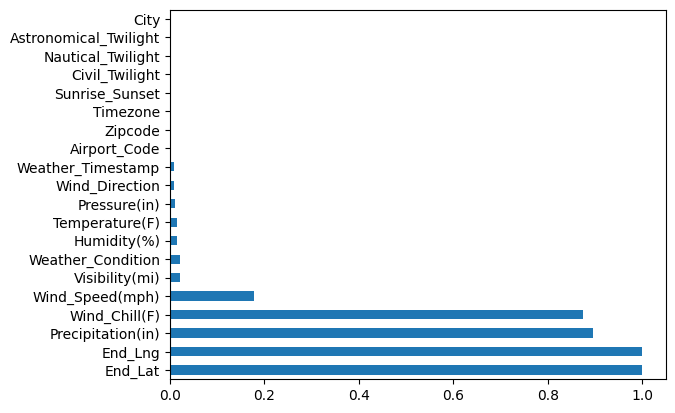

In [15]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

## Exploratory analysis & visualization using Matplotlib & Seaborn

Columns we'll analyze:

City

Start Time

Start Lat, Start Lng


In [16]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [18]:
df.City

,City
0,Dayton
1,Reynoldsburg
2,Williamsburg
3,Dayton
4,Dayton
...,...
499995,Atlanta
499996,Kinards
499997,Saluda
499998,Fair Play


In [19]:
cities = df.City.unique()
len(cities)

4458

##Road Condition Analysis

###scroll all the way to see the road condition analysis

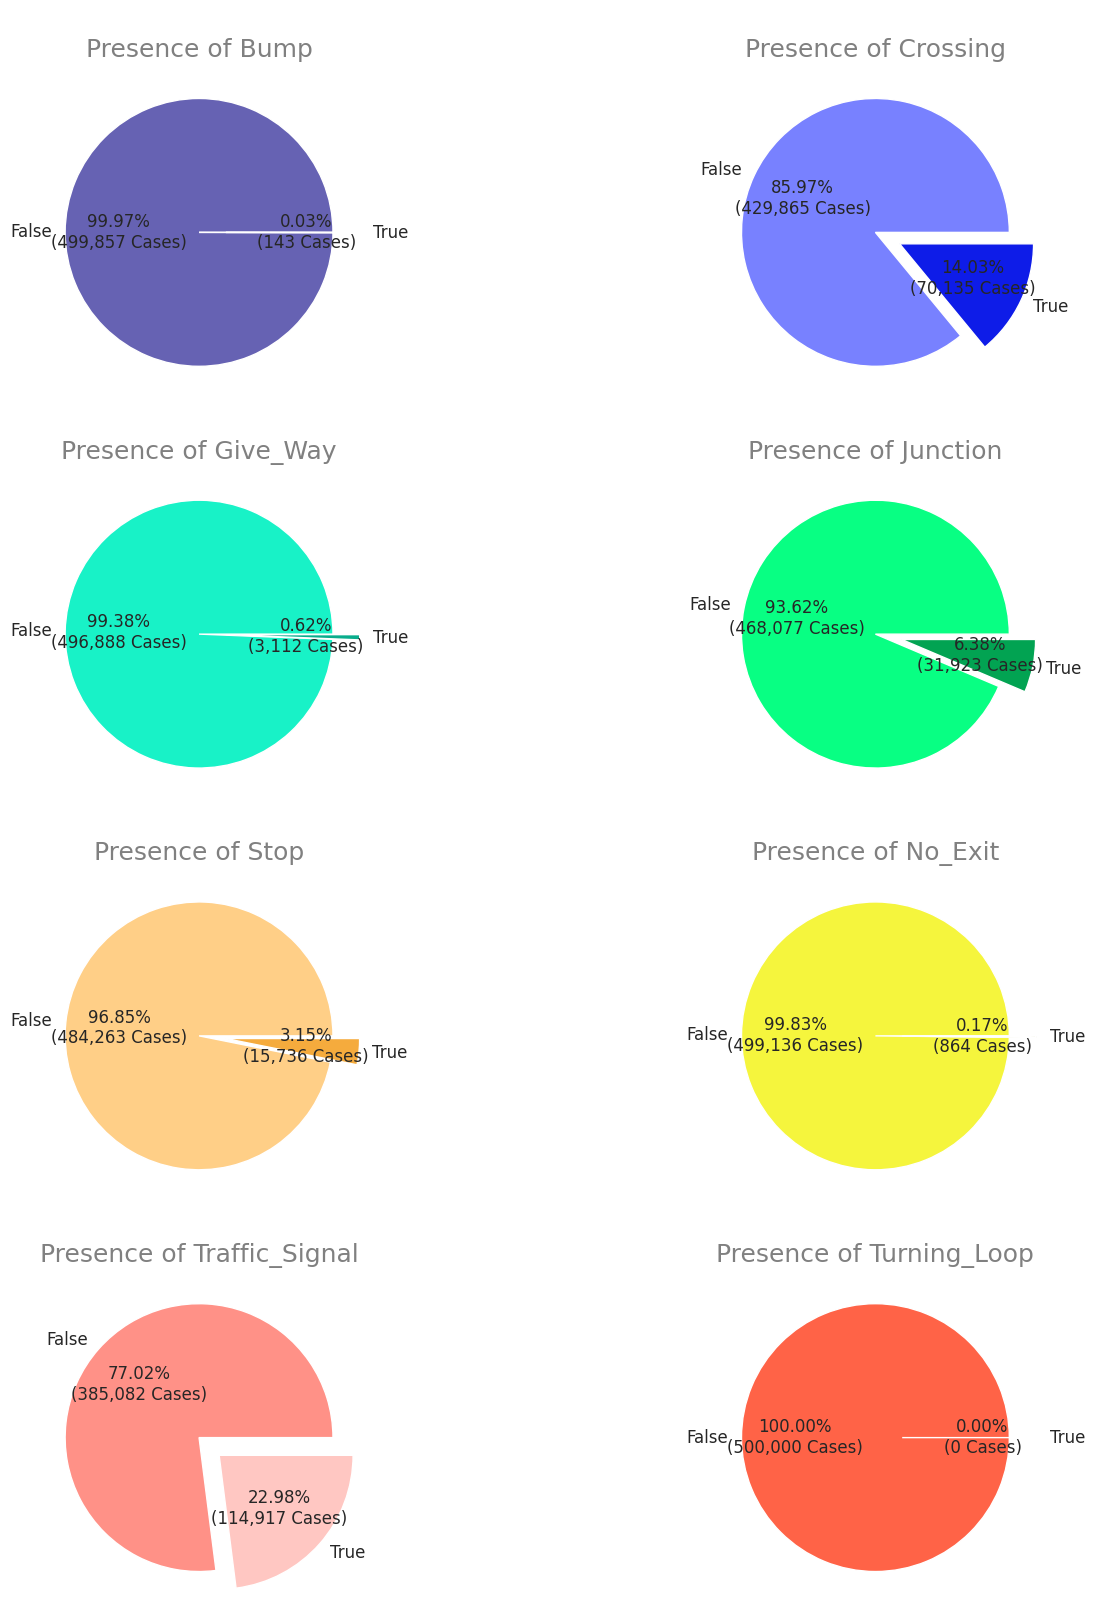

In [81]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize = (16,20))

road_conditions = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']
colors = [('#6662b3', '#00FF00'), ('#7881ff', '#0e1ce8'), ('#18f2c7', '#09ad8c'), ('#08ff83', '#02a352'), ('#ffcf87', '#f5ab3d'),
         ('#f5f53d', '#949410'), ('#ff9187', '#ffc7c2'), ('tomato', '#008000')]
count = 0

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)

for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:

    size = list(df[road_conditions[count]].value_counts())
    if len(size) != 2:
        size.append(0)

    labels = ['False', 'True']



    i.pie(size, labels = labels, colors = colors[count],
                    autopct = lambda pct: func(pct, size), labeldistance=1.1,
                    textprops={'fontsize': 12}, explode=[0, 0.2])

    title = '\nPresence of {}'.format(road_conditions[count])

    i.set_title(title, fontsize = 18, color='grey')

    count += 1

##Insights:

 Almost in every case (99.97%) Bumper was absent in the accident spot.

 In 14.03% cases, road accidents happened near the crossing.

 In 96.85% cases, there were no Stop near the accident area.

 6.38% road accident cases recorded near the junctions.

 There are no accident cases recorded near the Turning Loop.

 22.98% road accident cases recorded near the traffic signal.

##Cities analysis

In [20]:
cities_by_accident = df.City.value_counts()
cities_by_accident

,count
City,
Houston,26484
Los Angeles,18827
Austin,18528
Dallas,17365
Atlanta,9389
...,...
Dobbins,1
Oregon House,1
Travis Afb,1


In [21]:
cities_by_accident[:20]

,count
City,
Houston,26484
Los Angeles,18827
Austin,18528
Dallas,17365
Atlanta,9389
Sacramento,8052
Orlando,7395
Omaha,6849
Miami,6590


In [22]:
type(cities_by_accident)

pandas.core.series.Series

<Axes: ylabel='City'>

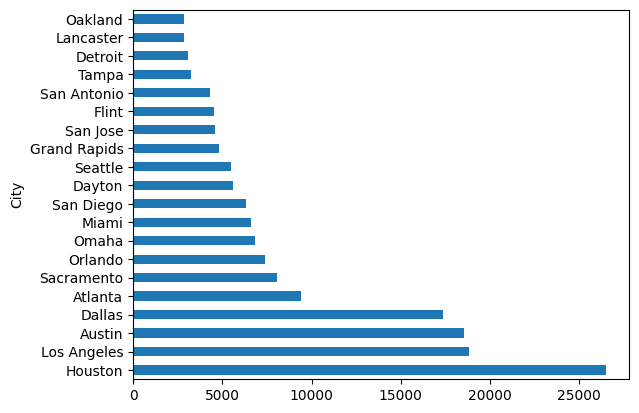

In [23]:
cities_by_accident[:20].plot(kind='barh')

In [24]:
import seaborn as sns
sns.set_style("darkgrid")

<Axes: xlabel='count', ylabel='Count'>

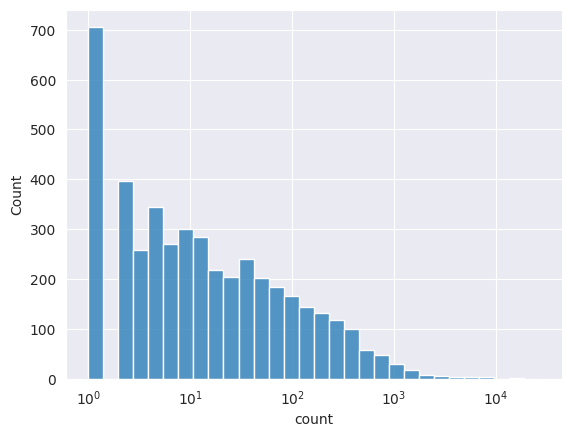

In [25]:
sns.histplot(cities_by_accident, log_scale=True)

In [26]:
cities_by_accident[cities_by_accident == 1]

,count
City,
Olympia Fields,1
Lena,1
Farragut,1
South Portsmouth,1
Graettinger,1
...,...
Dobbins,1
Oregon House,1
Travis Afb,1


##Start time


In [27]:
df.Start_Time

,Start_Time
0,2016-02-08 05:46:00
1,2016-02-08 06:07:59
2,2016-02-08 06:49:27
3,2016-02-08 07:23:34
4,2016-02-08 07:39:07
...,...
499995,2017-07-21 09:21:24
499996,2017-07-21 09:48:10
499997,2017-07-21 11:02:10
499998,2017-07-21 11:09:58


In [28]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [29]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

<Axes: xlabel='Start_Time', ylabel='Count'>

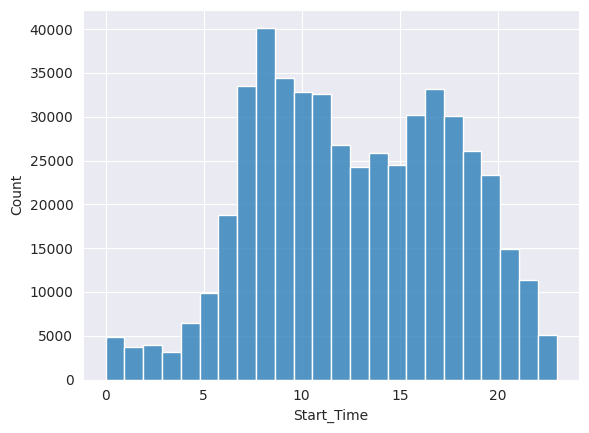

In [36]:
sns.histplot(df.Start_Time.dt.hour , bins=24)

A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)

Next higest percentage is 3 pm to 6 pm.

-Accidents by what day of the week

<Axes: xlabel='Start_Time', ylabel='Count'>

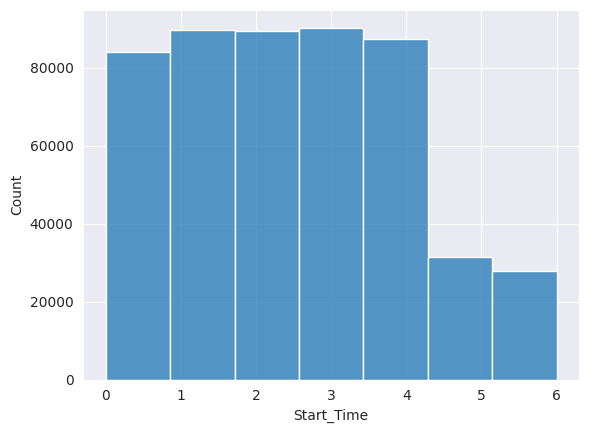

In [37]:
sns.histplot(df.Start_Time.dt.dayofweek , bins=7)

Is the distribution of accidents by hour the same on weekends as on weekdays.

<Axes: xlabel='Start_Time', ylabel='Count'>

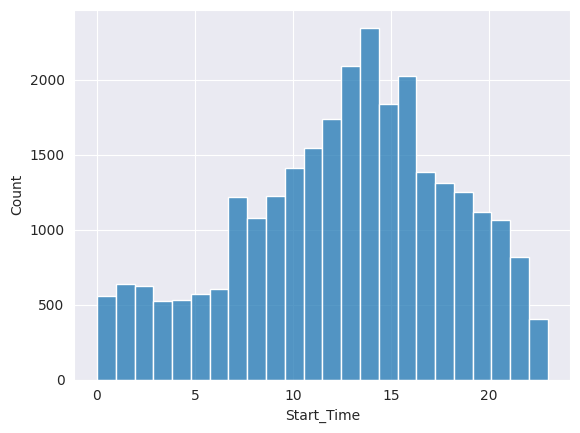

In [38]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.histplot(sundays_start_time.dt.hour, bins=24)

<Axes: xlabel='Start_Time', ylabel='Count'>

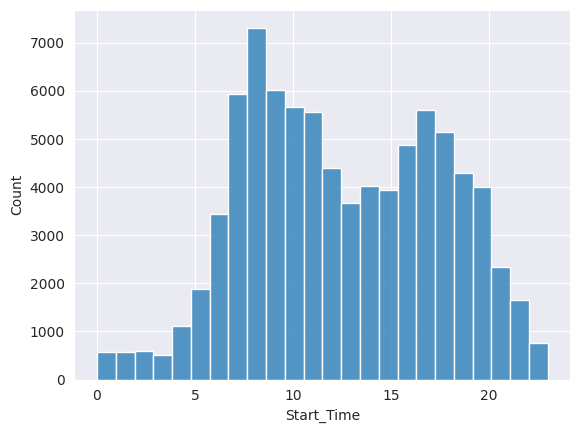

In [47]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.histplot(mondays_start_time.dt.hour, bins=24)

-On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

##Start Latitude & Longitude

In [73]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

In [74]:
df.Start_Lat

,Start_Lat
0,39.865147
1,39.928059
2,39.063148
3,39.747753
4,39.627781
...,...
499995,33.681126
499996,34.273846
499997,34.035545
499998,34.490196


In [75]:
df.Start_Lng

,Start_Lng
0,-84.058723
1,-82.831184
2,-84.032608
3,-84.205582
4,-84.188354
...,...
499995,-84.398689
499996,-81.851120
499997,-81.890373
499998,-83.022072


In [54]:
sample_df = df.sample(int(0.1 * len(df)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

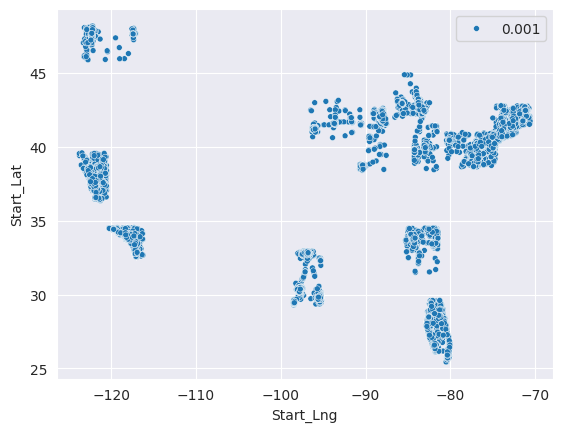

In [53]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [55]:
import folium

In [56]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [62]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [63]:
from folium.plugins import HeatMap

In [64]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [65]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

##Ask & answer questions about the data


-Which 5 states have the highest number of accidents? How about per capital?

-Among the top 100 cities in number of accidents, which states do they belong to most frequently.

-What time of the day are accidents most frequent in?

5-Which days of the week have the most accidents?

6-Which months have the most accidents?

7-What is the trend of accidents year over year (decreasing/increasing?)


##Summarize your inferences & write a conclusion

Insights:


The number of accidents per city decreases exponentially

Less than 5% of cities have more than 1000 yearly accidents.

Over 1200 cities have reported just one accident (need to investigate)